In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

dengue = pd.read_csv('datasets\\dengue.csv')
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [2]:
dengue.info

<bound method DataFrame.info of           Month  Year    Region  Dengue_Cases  Dengue_Deaths
0       January  2016  Region I           705              1
1      February  2016  Region I           374              0
2         March  2016  Region I           276              0
3         April  2016  Region I           240              2
4           May  2016  Region I           243              1
...         ...   ...       ...           ...            ...
1015     August  2020     BARMM            91              0
1016  September  2020     BARMM            16              8
1017    October  2020     BARMM            13              9
1018   November  2020     BARMM            15              1
1019   December  2020     BARMM            23              0

[1020 rows x 5 columns]>

In [3]:
dengue['Year'] = dengue['Year'].astype('int64')

In [4]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

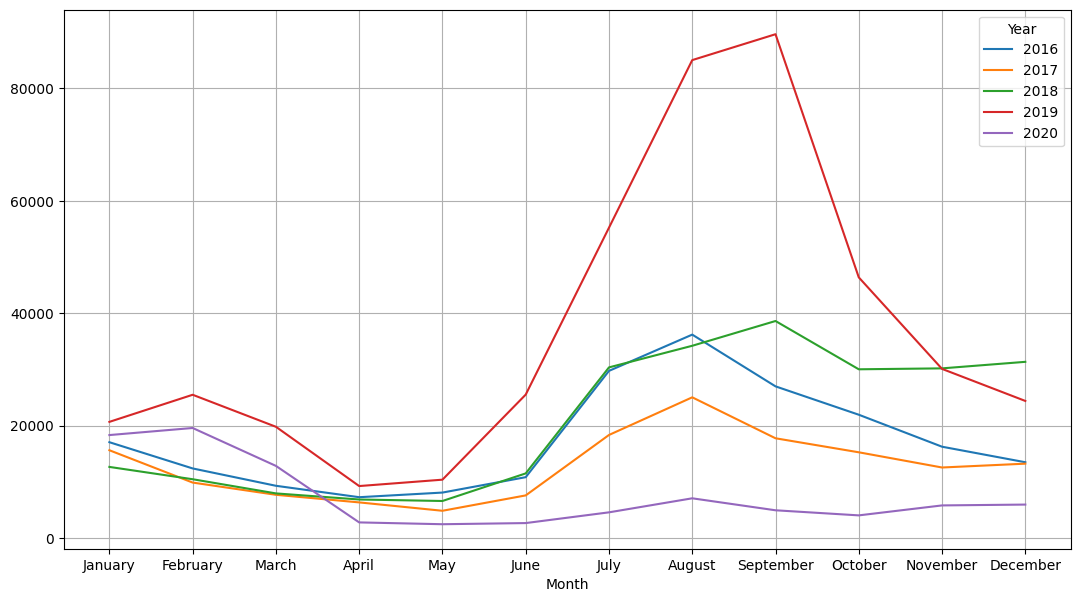

In [5]:
month = ['January','February','March','April','May','June','July','August','September','October','November','December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month, ordered=True)

cases_month = dengue.groupby([dengue.Month, dengue.Year])['Dengue_Cases'].sum()
cases_month.unstack().plot()
plt.gcf().set_size_inches(13,7)
plt.grid(True)
plt.xticks(range(0,12), month)
plt.show()

In [6]:
dengue.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

<h2>Total number of dengue cases and deaths per year</h2>

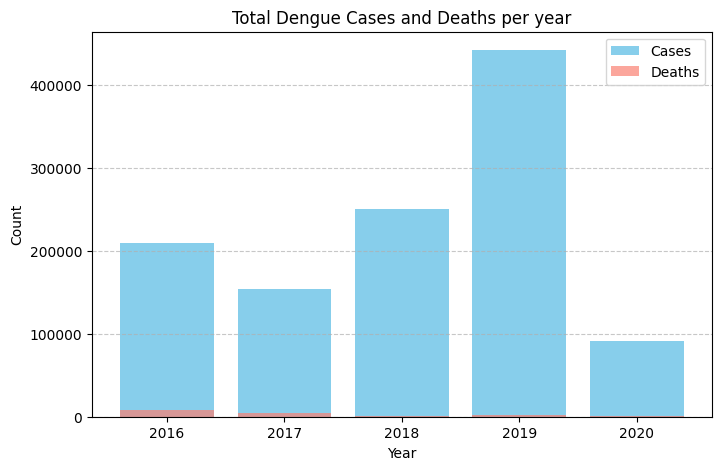

In [7]:
yearly = dengue.groupby('Year')[['Dengue_Cases','Dengue_Deaths']].sum().reset_index()

plt.figure(figsize=(8,5))
plt.bar(yearly['Year'],yearly['Dengue_Cases'], label='Cases', color='skyblue')
plt.bar(yearly['Year'],yearly['Dengue_Deaths'],label='Deaths',color='salmon',alpha=0.7)
plt.title('Total Dengue Cases and Deaths per year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.show()

<h2>Which region recorded the highest total dengue cases?<h2>

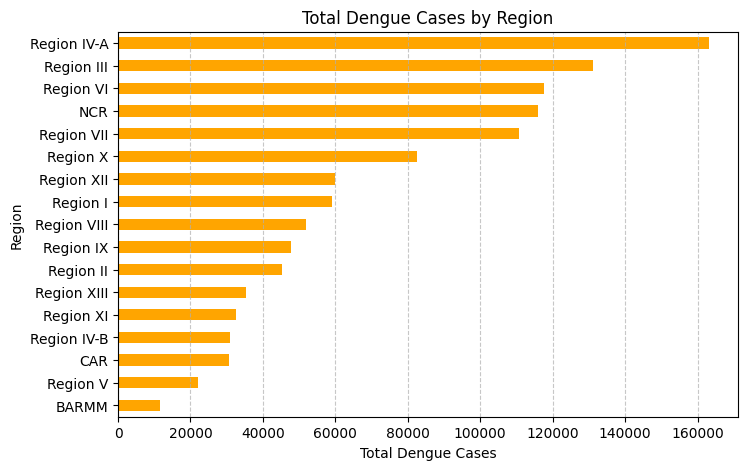

In [8]:
region_cases = dengue.groupby('Region')['Dengue_Cases'].sum().sort_values(ascending=True)

plt.figure(figsize=(8,5))
region_cases.plot(kind='barh', color='orange')
plt.title('Total Dengue Cases by Region')
plt.xlabel('Total Dengue Cases')
plt.ylabel('Region')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

<h2> What is the monthly trend of dengue cases across all years?<h2>

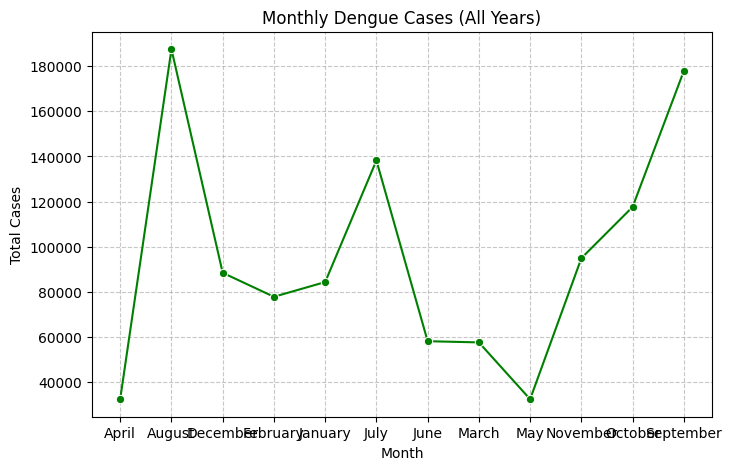

In [11]:
monthly = dengue.groupby('Month')['Dengue_Cases'].sum().reset_index()

plt.figure(figsize=(8,5))
sns.lineplot(data=monthly, x='Month', y='Dengue_Cases', marker='o', color='green')
plt.title('Monthly Dengue Cases (All Years)')
plt.xlabel('Month')
plt.ylabel('Total Cases')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

<h2>Which month has the highest average dengue cases across all years?<h2>

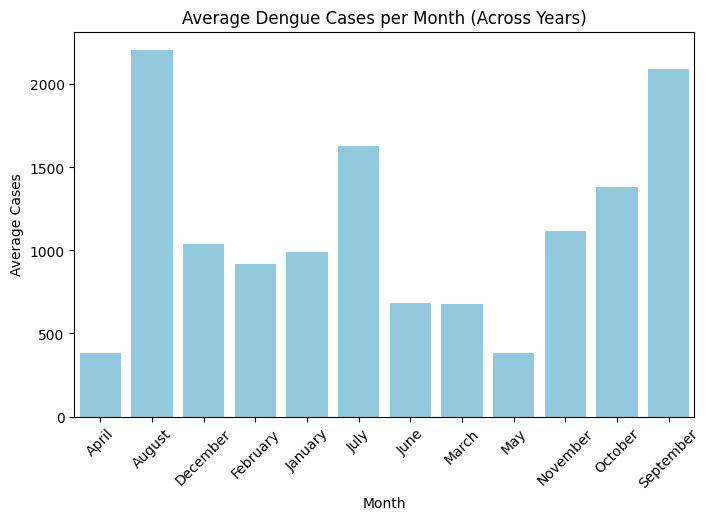

In [12]:
month_avg = dengue.groupby('Month')['Dengue_Cases'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=month_avg, x='Month', y='Dengue_Cases', color='skyblue')
plt.title('Average Dengue Cases per Month (Across Years)')
plt.xlabel('Month')
plt.ylabel('Average Cases')
plt.xticks(rotation=45)

plt.show()

<h2>Which regions show the highest dengue death rate (deaths per case)?<h2>

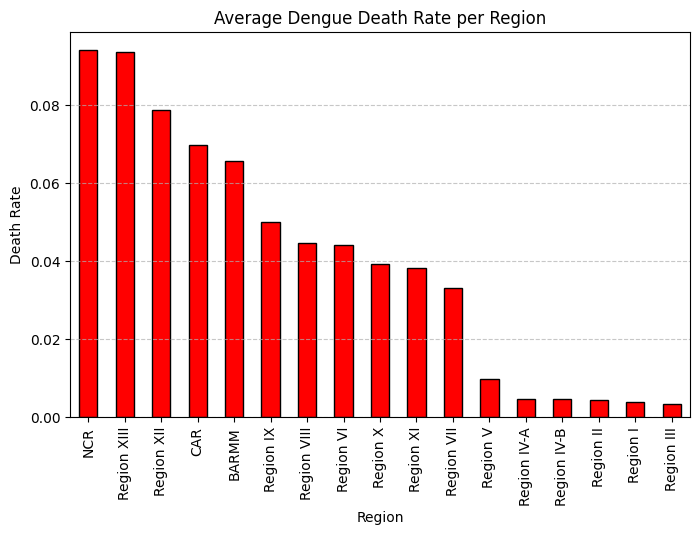

In [13]:
dengue['Death_Rate'] = dengue['Dengue_Deaths'] / dengue['Dengue_Cases']
rate_region = dengue.groupby('Region')['Death_Rate'].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
rate_region.plot(kind='bar', color='red', edgecolor='black')
plt.title('Average Dengue Death Rate per Region')
plt.xlabel('Region')
plt.ylabel('Death Rate')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<h2>What is the percentage contribution of each region to total dengue cases?<h2>

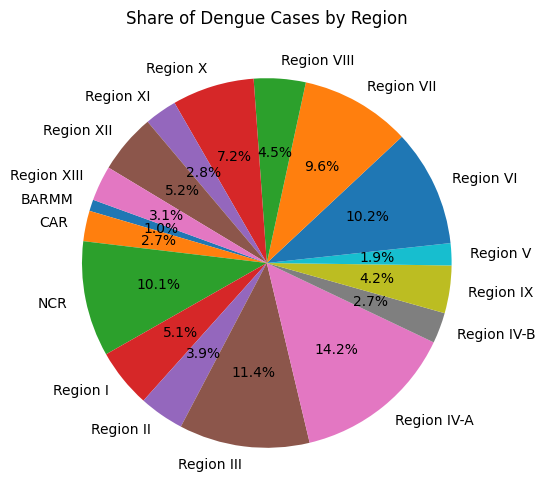

In [21]:
region_share = dengue.groupby('Region')['Dengue_Cases'].sum()

plt.figure(figsize=(6,6))
plt.pie(region_share, labels=region_share.index, autopct='%1.1f%%', startangle=160)
plt.title('Share of Dengue Cases by Region')
plt.show()

<h2>Which month and region combination had the highest recorded dengue cases?<h2>

In [22]:
import pandas as pd

# Load the data into a pandas DataFrame
dengue = pd.read_csv('datasets\\dengue.csv')

max_row = dengue.loc[dengue['Dengue_Cases'].idxmax()]
print("Highest Dengue Case Record:")
print(max_row[['Month', 'Year', 'Region', 'Dengue_Cases', 'Dengue_Deaths']])

Highest Dengue Case Record:
Month              September
Year                    2019
Region           Region IV-A
Dengue_Cases           21658
Dengue_Deaths             48
Name: 224, dtype: object


<h1>Prediction using Linear Regression</h1>

<h2>New Library </H2>
<hr>
<h4>SCIKT LEARN</h4>
<h3> pip install scikit-learn</h3>

In [26]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [27]:
import sklearn

In [28]:
dengue['Month'] = dengue['Month'].astype('str')

In [29]:
# Combine Month and Year into a Date column
dengue['Date'] = pd.to_datetime(dengue['Month'] + ' ' + dengue['Year'].astype(str))

# Optional: sort by date
dengue = dengue.sort_values('Date')

In [30]:
region4_df = dengue[dengue['Region'] == 'Region IV-A']
monthly_cases = region4_df.groupby('Date')['Dengue_Cases'].sum().reset_index()


In [31]:
monthly_cases

,Date,Dengue_Cases
0,2016-01-01,2993
1,2016-02-01,2035
2,2016-03-01,1327
3,2016-04-01,838
4,2016-05-01,714
5,2016-06-01,778
6,2016-07-01,2270
7,2016-08-01,3218
8,2016-09-01,3454
9,2016-10-01,3175


In [32]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Convert dates to ordinal for regression
#monthly_cases['Date_Ordinal'] = monthly_cases['Date'].map(lambda x: x.toordinal())
#other 
monthly_cases['Date_Ordinal'] = monthly_cases['Date'].map(pd.Timestamp.toordinal)

# # Reshape for sklearn
X = monthly_cases['Date_Ordinal'].values.reshape(-1, 1)
y = monthly_cases['Dengue_Cases'].values

# # Fit model
model = LinearRegression()
model.fit(X, y)

# # Predict
monthly_cases['Predicted_Cases'] = model.predict(X)

# # Evaluate: R-squared
r_squared = model.score(X, y)
print(f"The model explains {r_squared:.1%} of the variation in dengue cases.")


The model explains 1.7% of the variation in dengue cases.


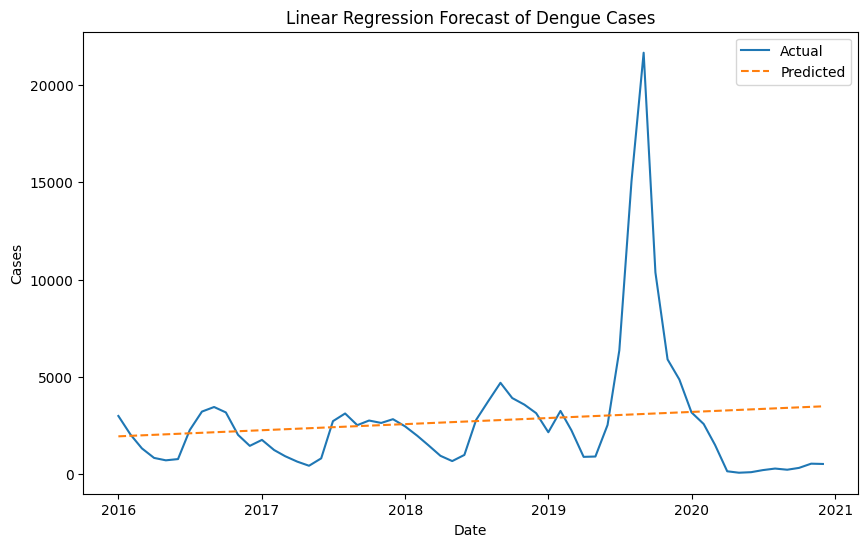

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(monthly_cases['Date'], monthly_cases['Dengue_Cases'], label='Actual')
plt.plot(monthly_cases['Date'], monthly_cases['Predicted_Cases'], label='Predicted', linestyle='--')
plt.legend()
plt.title('Linear Regression Forecast of Dengue Cases')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.show()